In [2]:
import cv2

In [3]:
img = cv2.imread('test.jpg')
cv2.imshow('original', img)
cv2.waitKey(0)

-1

In [4]:
img_ = img.copy()
print(img_.shape)

(512, 512, 3)


In [5]:
for row in range(img_.shape[0]):
    for col in range(img_.shape[1]):
        img_[row,col] = img[row,col] -5
print(img[20,40])
print(img_[20,40])
B = img_[:,:,0].max()
G = img_[:,:,1].max()
R = img_[:,:,2].max()

[110 144 228]
[105 139 223]


In [6]:
img_2 = img.copy()
import numpy as np
import matplotlib.pyplot as plt
CB = np.array([[255/B,0,0],[0,255/G,0],[0,0,255/R]])
for row in range(img_.shape[0]):
    for col in range(img_.shape[1]):
        img_2[row,col] = np.dot(CB,img_2[row,col])

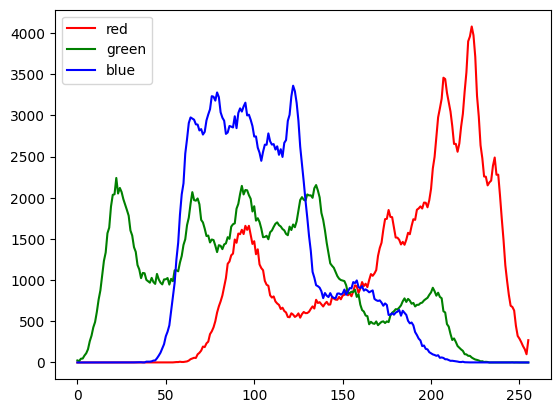

In [7]:
histr = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histr,c = 'r', label = 'red')
histr = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histr,c = 'g', label = 'green')
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,c = 'b', label = 'blue')
plt.legend(loc = 2)
plt.show()

In [8]:
def compute_hist(img):
    hist = np.zeros((256,), np.uint8)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    return hist
def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    #print(cumulator)
    new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    #new_hist = np.uint8(new_hist)
    return new_hist

In [9]:
hist = compute_hist(img[:,:,0])
new_hist = equal_hist(hist)
#img = new_hist

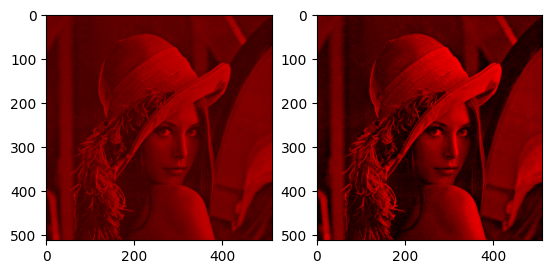

In [10]:

img_3 = img.copy()
#cv2.imread(img_3)
for row in range(img_.shape[0]):
    for col in range(img_.shape[1]):
        img_3[row,col,0] = new_hist[img[row,col,0]]

fix, (ax1, ax2) = plt.subplots(1,2)
img[:,:,1] = 0
img[:,:,2] = 0
img_3[:,:,1] = 0
img_3[:,:,2] = 0
ax1.imshow(img)
ax2.imshow(img_3)
plt.show()

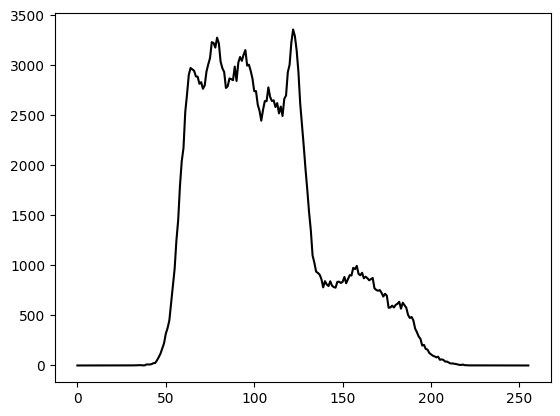

In [11]:
histr_1 = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(histr_1, c = 'k',label = 'histequal')


256
1


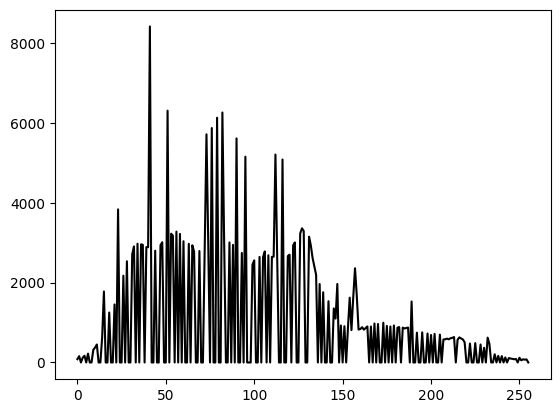

: 

In [15]:
import cv2
histr_1 = cv2.calcHist([img_3],[0],None,[256],[0,256])
print(histr_1.shape[0])
print(histr_1.shape[1])
cv2.imshow('mad', histr_1)
cv2.waitKey(0)
plt.plot(histr_1, c = 'k',label = 'histequal')

In [13]:
import cv2
image = cv2.imread("test.jpg")
img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
cv2.imshow('img_input',image)
cv2.imshow('img_output',img_output)
cv2.waitKey(0)

-1